In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#fname = 'Enoo'
#fname = 'Enos'
#fname = 'Nakao'
#fname = 'Nakas'
#fname = 'Ozeo2'
fname = 'Ozes'
#fname = 'sugio_ok'
#fname = 'sugis_ok'
#fname = 'tano_ok'
#fname = 'tans_ok'
data = pd.read_table(os.path.join('ivr',fname + '.tsv'))

In [3]:
Frame = data['Frame'].to_numpy()
X = np.vstack([data['face_Tx'].to_numpy(),data['face_Ty'].to_numpy(),data['face_Tz'].to_numpy()]).T
V = np.vstack([data['z_adj_x'].to_numpy(),data['z_adj_y'].to_numpy(),data['z_adj_z'].to_numpy()]).T
roll  = data['roll'].to_numpy()
pitch = data['pitch'].to_numpy()
yaw   = data['yaw'].to_numpy()
V = V / np.linalg.norm(V,axis=1)[:,None]

# duration = 1 min (30fps)
DURATION = 30*60

In [4]:
# draw graphs
R_list = []
P_list = []
Y_list = []
V_list = []
for i in range(0,Frame[-1],DURATION):
    R = np.mean(roll[np.where((Frame >= i) & (Frame < i + DURATION))])
    P = np.mean(pitch[np.where((Frame >= i) & (Frame < i + DURATION))])
    Y = np.mean(yaw[np.where((Frame >= i) & (Frame < i + DURATION))])
    R_list.append(R)
    P_list.append(P)
    Y_list.append(Y)
    
    VV = np.mean(V[np.where((Frame >= i) & (Frame < i + DURATION)),1])
    V_list.append(VV)

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

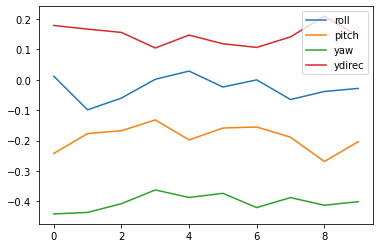

In [6]:
plt.plot(R_list,label="roll")
plt.plot(P_list,label='pitch')
plt.plot(Y_list,label='yaw')
plt.plot(V_list,label='ydirec')
plt.legend()

In [7]:
T = X[:,2] / V[:,2]
XX = X[:,0] + V[:,0]*T
YY = X[:,1] + V[:,1]*T

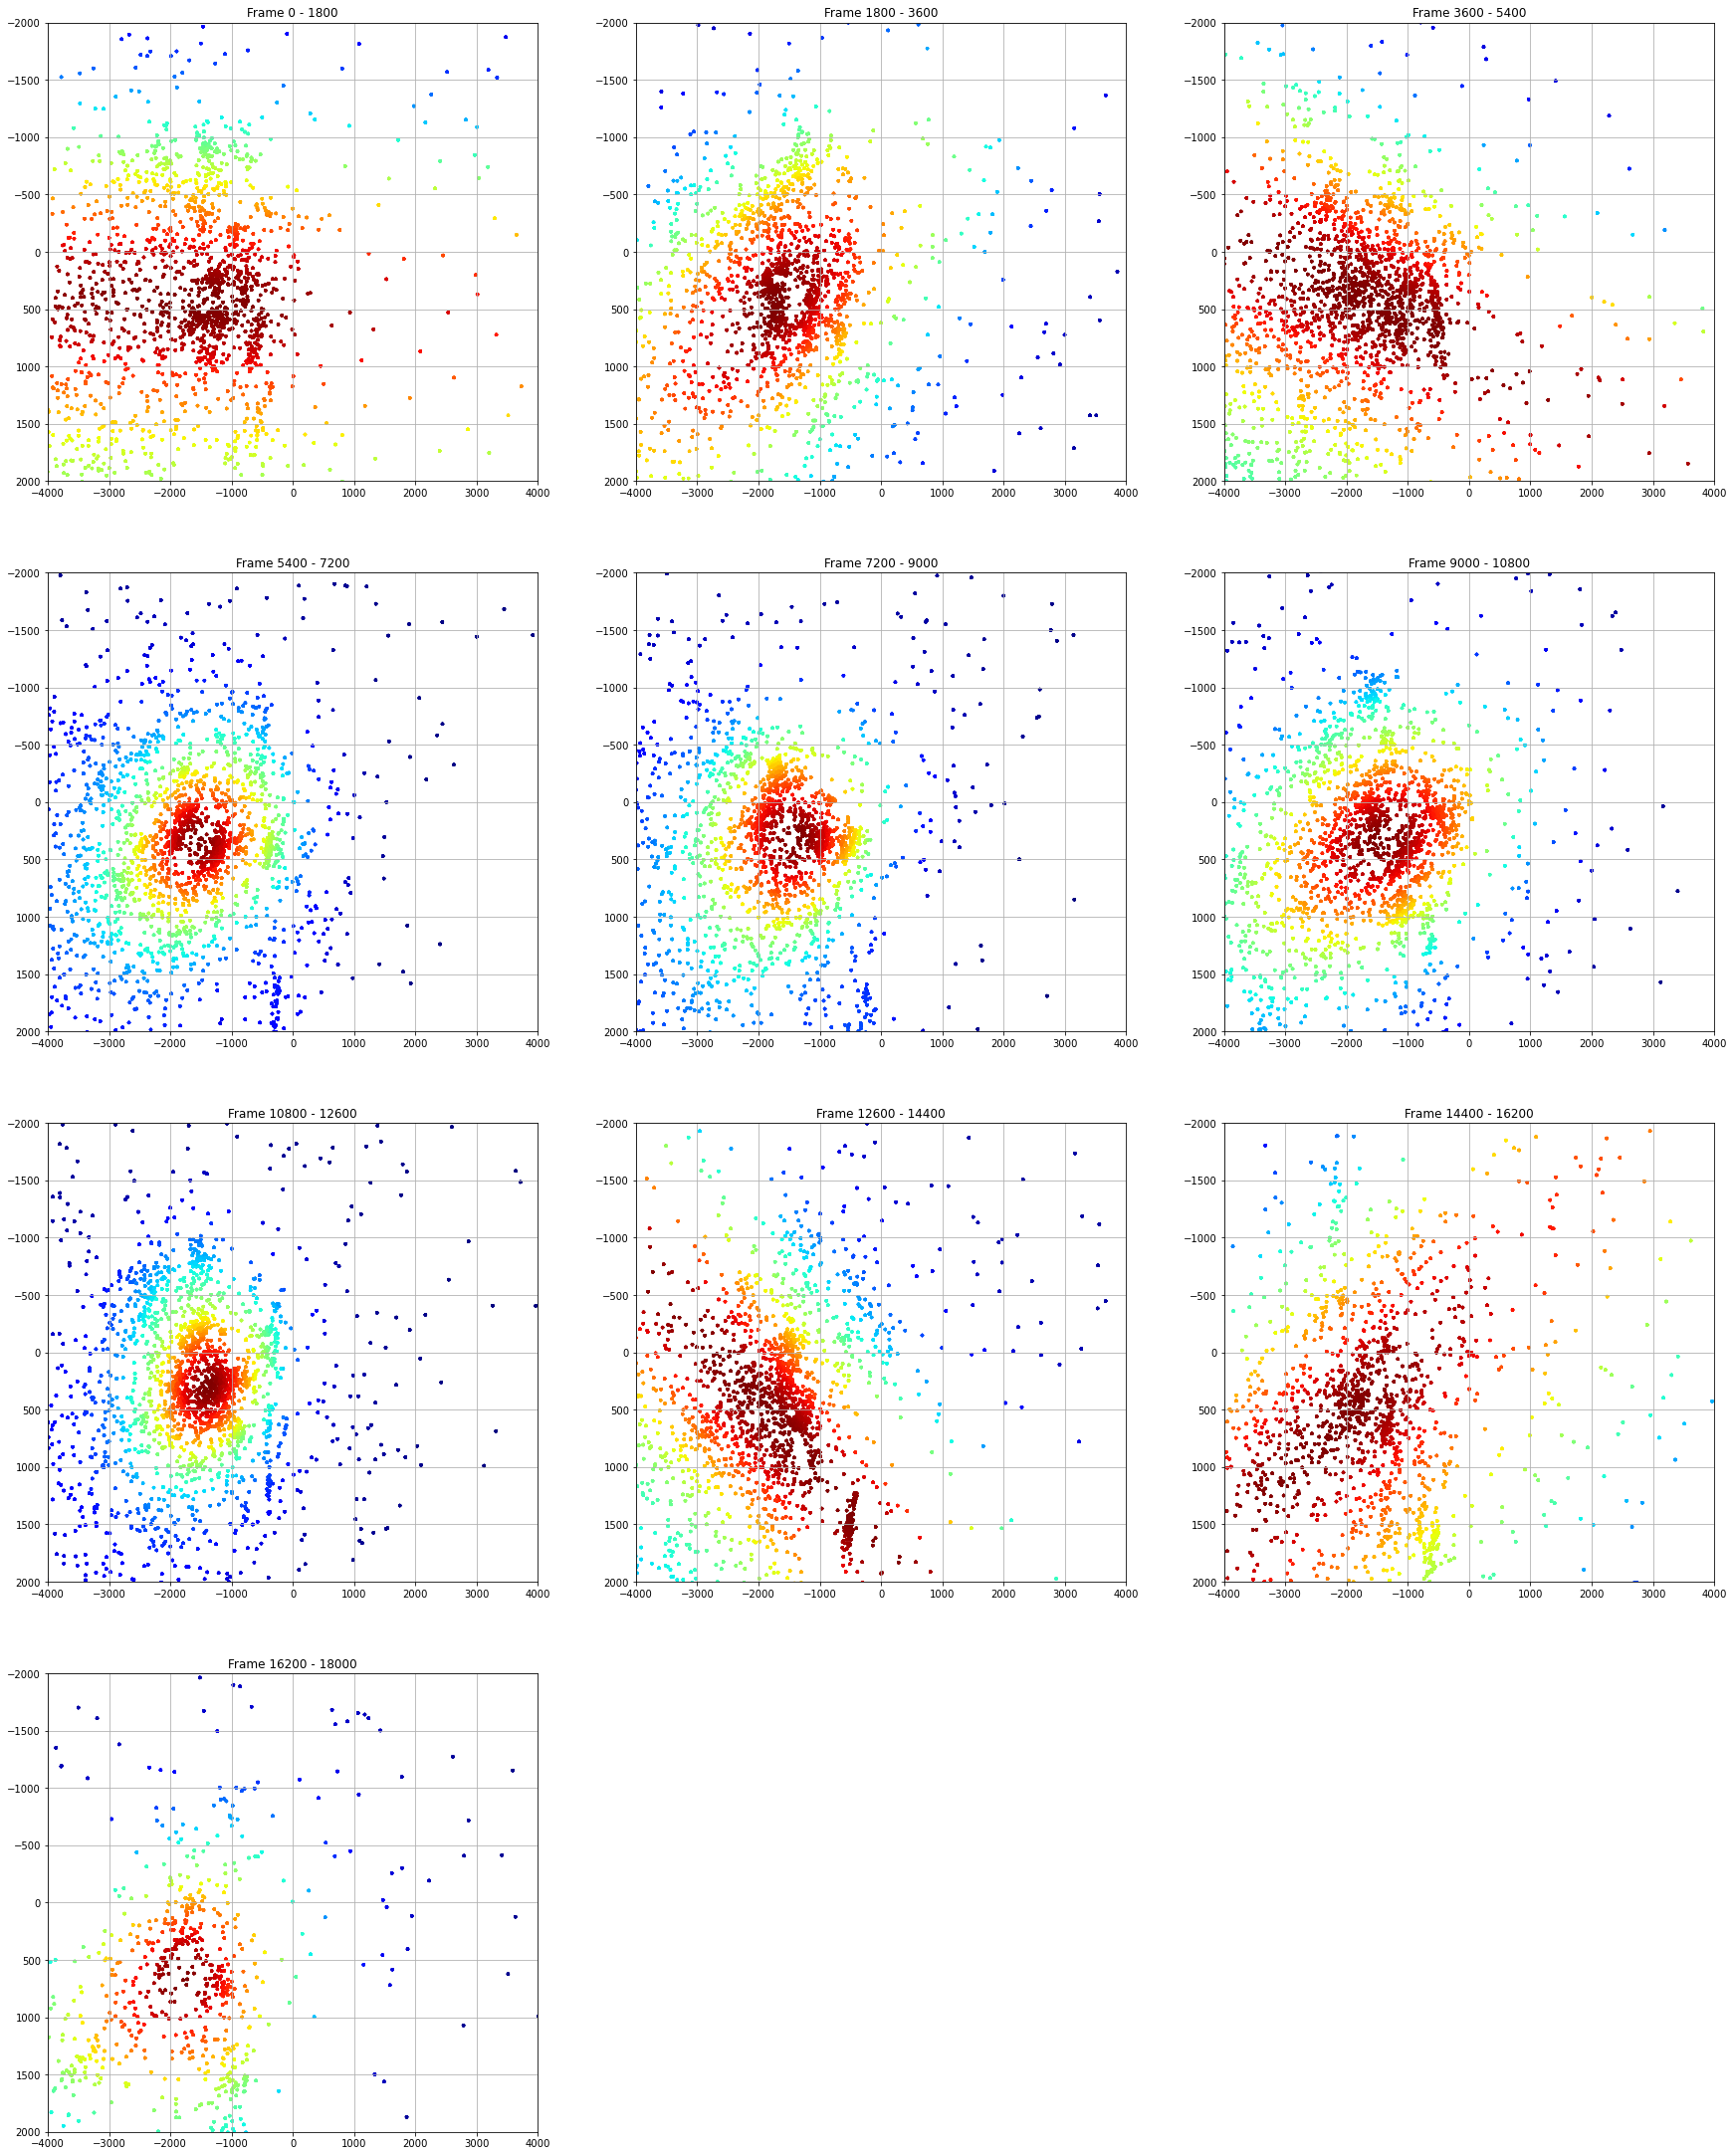

In [8]:
plt.figure(figsize=(30,100))

for n,i in enumerate(range(0,Frame[-1],DURATION)):
    plt.subplot(10,3,n+1)
    plt.title(f'Frame {i} - {i+DURATION}')
    XXX = XX[np.where((Frame >= i) & (Frame < i + DURATION))]
    YYY = YY[np.where((Frame >= i) & (Frame < i + DURATION))]
    
    xy = np.vstack([XXX,YYY]) 
    z = gaussian_kde(xy)(xy)
    # plt.scatter(XXX,YYY)
    
    plt.scatter(XXX, YYY, c=z, s=5, cmap="jet")
    #plt.invert_yaxis()
    # fig.colorbar(im)
    plt.xlim(-4000,4000)
    plt.ylim(2000,-2000)    
    plt.grid()

plt.savefig(fname + '.pdf')
plt.show()
